In this notebook, we'll explore how to manipulate and prepare data for creating an insightful dashboard. We'll cover data cleaning techniques, imputation methods, handling outliers, feature scaling, data transformation, encoding categorical variables, aggregating data, visualization best practices, and various types of plots commonly used in dashboards.

## Table of Contents

1. [Data Cleaning and Imputation](#data-cleaning)
2. [Handling Outliers](#handling-outliers)
3. [Feature Scaling and Normalization](#feature-scaling)
4. [Data Transformation](#data-transformation)
5. [Categorical Variable Encoding](#categorical-encoding)
6. [Creating New Columns](#creating-columns)
7. [Aggregating and Grouping Data](#aggregating-data)
8. [Good Practices for Visualization](#visualization-practices)
   - Color Choices and Palettes
9. [Overview of Different Plots](#plots-overview)
   - Bar Charts (Vertical and Horizontal)
   - Bubble Plot
   - Sankey Diagram
   - Map Plot using Plotly
   - Temporal Plot
   - Boxplot and Violin Plot
10. [Conclusion](#conclusion)

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For interactive plots
import plotly.express as px
import plotly.graph_objects as go

# For advanced plots
from wordcloud import WordCloud
from pywaffle import Waffle
import networkx as nx
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

# For Venn diagram
from matplotlib_venn import venn2, venn3

# For ridgeline plot
import joypy

# For financial data
import pandas_datareader as web
import datetime as dt

# Set styles
sns.set(style='whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# <a name="data-cleaning"></a> Data Cleaning and Imputation

Data cleaning is a crucial step in data analysis and preparation for dashboards. It involves handling missing values, correcting errors, and ensuring consistency.

### Loading Sample Data 


In [57]:
# Create a sample DataFrame
data = {
    'Date': pd.date_range(start='2022-01-01', periods=15, freq='D'),
    'Sales': [200, np.nan, 340, 400, np.nan, 500, 600, np.nan, 800, 900, 1000, 1100, np.nan, 1300, 1400],
    'Category': ['A', 'B', np.nan, 'A', 'B', 'B', 'A', 'B', 'A', np.nan, 'B', 'A', 'B', np.nan, 'A']
}

df = pd.DataFrame(data)
df

Date   Sales Category
0  2022-01-01   200.0        A
1  2022-01-02     NaN        B
2  2022-01-03   340.0      NaN
3  2022-01-04   400.0        A
4  2022-01-05     NaN        B
5  2022-01-06   500.0        B
6  2022-01-07   600.0        A
7  2022-01-08     NaN        B
8  2022-01-09   800.0        A
9  2022-01-10   900.0      NaN
10 2022-01-11  1000.0        B
11 2022-01-12  1100.0        A
12 2022-01-13     NaN        B
13 2022-01-14  1300.0      NaN
14 2022-01-15  1400.0        A

### Identifying Missing Values

In [59]:
# Check for missing values
df.isnull().sum()

Date        0
Sales       4
Category    3
dtype: int64

###  Mean Imputation
Mean imputation replaces missing numerical values with the mean of the column.

In [61]:
# Mean imputation for 'Sales'
df['Sales_Mean_Imputed'] = df['Sales'].fillna(df['Sales'].mean())
df

Date   Sales Category  Sales_Mean_Imputed
0  2022-01-01   200.0        A          200.000000
1  2022-01-02     NaN        B          776.363636
2  2022-01-03   340.0      NaN          340.000000
3  2022-01-04   400.0        A          400.000000
4  2022-01-05     NaN        B          776.363636
5  2022-01-06   500.0        B          500.000000
6  2022-01-07   600.0        A          600.000000
7  2022-01-08     NaN        B          776.363636
8  2022-01-09   800.0        A          800.000000
9  2022-01-10   900.0      NaN          900.000000
10 2022-01-11  1000.0        B         1000.000000
11 2022-01-12  1100.0        A         1100.000000
12 2022-01-13     NaN        B          776.363636
13 2022-01-14  1300.0      NaN         1300.000000
14 2022-01-15  1400.0        A         1400.000000

### Median Imputation

Median imputation is less affected by outliers.

In [63]:
# Median imputation for 'Sales'
df['Sales_Median_Imputed'] = df['Sales'].fillna(df['Sales'].median())
df

Date   Sales Category  Sales_Mean_Imputed  Sales_Median_Imputed
0  2022-01-01   200.0        A          200.000000                 200.0
1  2022-01-02     NaN        B          776.363636                 800.0
2  2022-01-03   340.0      NaN          340.000000                 340.0
3  2022-01-04   400.0        A          400.000000                 400.0
4  2022-01-05     NaN        B          776.363636                 800.0
5  2022-01-06   500.0        B          500.000000                 500.0
6  2022-01-07   600.0        A          600.000000                 600.0
7  2022-01-08     NaN        B          776.363636                 800.0
8  2022-01-09   800.0        A          800.000000                 800.0
9  2022-01-10   900.0      NaN          900.000000                 900.0
10 2022-01-11  1000.0        B         1000.000000                1000.0
11 2022-01-12  1100.0        A         1100.000000                1100.0
12 2022-01-13     NaN        B          776.363636                 800.0
13 2022-01-14  1300.0      NaN         1300.000000                1300.0
14 2022-01-15  1400.0        A         1400.000000                1400.0

## Interpolation for Temporal Data
Interpolation estimates missing values using the data's trend over time

In [65]:
# Interpolation for 'Sales'
df['Sales_Interpolated'] = df['Sales'].interpolate(method='linear')
df

Date   Sales Category  Sales_Mean_Imputed  Sales_Median_Imputed  \
0  2022-01-01   200.0        A          200.000000                 200.0   
1  2022-01-02     NaN        B          776.363636                 800.0   
2  2022-01-03   340.0      NaN          340.000000                 340.0   
3  2022-01-04   400.0        A          400.000000                 400.0   
4  2022-01-05     NaN        B          776.363636                 800.0   
5  2022-01-06   500.0        B          500.000000                 500.0   
6  2022-01-07   600.0        A          600.000000                 600.0   
7  2022-01-08     NaN        B          776.363636                 800.0   
8  2022-01-09   800.0        A          800.000000                 800.0   
9  2022-01-10   900.0      NaN          900.000000                 900.0   
10 2022-01-11  1000.0        B         1000.000000                1000.0   
11 2022-01-12  1100.0        A         1100.000000                1100.0   
12 2022-01-13     NaN        B          776.363636                 800.0   
13 2022-01-14  1300.0      NaN         1300.000000                1300.0   
14 2022-01-15  1400.0        A         1400.000000                1400.0   

    Sales_Interpolated  
0                200.0  
1                270.0  
2                340.0  
3                400.0  
4                450.0  
5                500.0  
6                600.0  
7                700.0  
8                800.0  
9                900.0  
10              1000.0  
11              1100.0  
12              1200.0  
13              1300.0  
14              1400.0

## Handling Categorical Missing Data
Fill missing categorical values with the mode or create a new category

In [67]:
# Fill missing 'Category' with mode
df['Category_Filled'] = df['Category'].fillna(df['Category'].mode()[0])
df

Date   Sales Category  Sales_Mean_Imputed  Sales_Median_Imputed  \
0  2022-01-01   200.0        A          200.000000                 200.0   
1  2022-01-02     NaN        B          776.363636                 800.0   
2  2022-01-03   340.0      NaN          340.000000                 340.0   
3  2022-01-04   400.0        A          400.000000                 400.0   
4  2022-01-05     NaN        B          776.363636                 800.0   
5  2022-01-06   500.0        B          500.000000                 500.0   
6  2022-01-07   600.0        A          600.000000                 600.0   
7  2022-01-08     NaN        B          776.363636                 800.0   
8  2022-01-09   800.0        A          800.000000                 800.0   
9  2022-01-10   900.0      NaN          900.000000                 900.0   
10 2022-01-11  1000.0        B         1000.000000                1000.0   
11 2022-01-12  1100.0        A         1100.000000                1100.0   
12 2022-01-13     NaN        B          776.363636                 800.0   
13 2022-01-14  1300.0      NaN         1300.000000                1300.0   
14 2022-01-15  1400.0        A         1400.000000                1400.0   

    Sales_Interpolated Category_Filled  
0                200.0               A  
1                270.0               B  
2                340.0               A  
3                400.0               A  
4                450.0               B  
5                500.0               B  
6                600.0               A  
7                700.0               B  
8                800.0               A  
9                900.0               A  
10              1000.0               B  
11              1100.0               A  
12              1200.0               B  
13              1300.0               A  
14              1400.0               A

# <a name="handling-outliers"></a> Handling Outliers
Outliers can skew your analysis and visualizations. Detecting and handling them is essential.

In [69]:
new_row = {
    'Date': pd.to_datetime('2022-01-16'),
    'Sales': 5000,  # This is an outlier value
    'Category': 'A'
}

new_row_df = pd.DataFrame([new_row])

# Append the new row to the DataFrame using pd.concat()
df_outlier = pd.concat([df, new_row_df], ignore_index=True)

## Detecting Outliers Using Boxplot

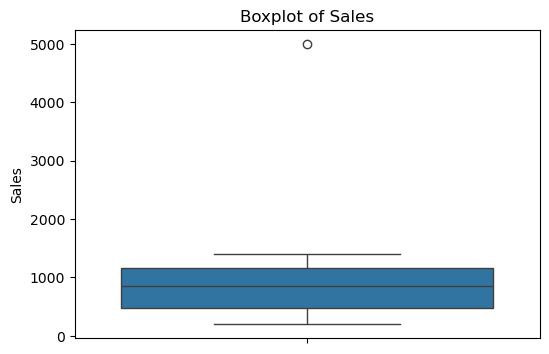

In [71]:
# Boxplot to detect outliers
plt.figure(figsize=(6, 4))
sns.boxplot(y='Sales', data=df_outlier)
plt.title('Boxplot of Sales')
plt.show()

## Handling Outliers
You can remove, transform, or cap outliers.

In [73]:
# Remove outliers using IQR
Q1 = df_outlier['Sales'].quantile(0.25)
Q3 = df_outlier['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df_outlier[(df_outlier['Sales'] >= lower_bound) & (df_outlier['Sales'] <= upper_bound)]
df_no_outliers

Date   Sales Category  Sales_Mean_Imputed  Sales_Median_Imputed  \
0  2022-01-01   200.0        A               200.0                 200.0   
2  2022-01-03   340.0      NaN               340.0                 340.0   
3  2022-01-04   400.0        A               400.0                 400.0   
5  2022-01-06   500.0        B               500.0                 500.0   
6  2022-01-07   600.0        A               600.0                 600.0   
8  2022-01-09   800.0        A               800.0                 800.0   
9  2022-01-10   900.0      NaN               900.0                 900.0   
10 2022-01-11  1000.0        B              1000.0                1000.0   
11 2022-01-12  1100.0        A              1100.0                1100.0   
13 2022-01-14  1300.0      NaN              1300.0                1300.0   
14 2022-01-15  1400.0        A              1400.0                1400.0   

    Sales_Interpolated Category_Filled  
0                200.0               A  
2                340.0               A  
3                400.0               A  
5                500.0               B  
6                600.0               A  
8                800.0               A  
9                900.0               A  
10              1000.0               B  
11              1100.0               A  
13              1300.0               A  
14              1400.0               A

# <a name="feature-scaling"></a> Feature Scaling and Normalization
Feature scaling brings alla variables into the same range, which is important for some algorithms and visualizations.

## Min-Max Scaling

$X_{scaled} = \frac{X-X_{min}}{X_{max}-X_{min}}$

obs. outliers can create problems.

In [75]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Sales_MinMax'] = scaler.fit_transform(df[['Sales_Interpolated']])
df

Date   Sales Category  Sales_Mean_Imputed  Sales_Median_Imputed  \
0  2022-01-01   200.0        A          200.000000                 200.0   
1  2022-01-02     NaN        B          776.363636                 800.0   
2  2022-01-03   340.0      NaN          340.000000                 340.0   
3  2022-01-04   400.0        A          400.000000                 400.0   
4  2022-01-05     NaN        B          776.363636                 800.0   
5  2022-01-06   500.0        B          500.000000                 500.0   
6  2022-01-07   600.0        A          600.000000                 600.0   
7  2022-01-08     NaN        B          776.363636                 800.0   
8  2022-01-09   800.0        A          800.000000                 800.0   
9  2022-01-10   900.0      NaN          900.000000                 900.0   
10 2022-01-11  1000.0        B         1000.000000                1000.0   
11 2022-01-12  1100.0        A         1100.000000                1100.0   
12 2022-01-13     NaN        B          776.363636                 800.0   
13 2022-01-14  1300.0      NaN         1300.000000                1300.0   
14 2022-01-15  1400.0        A         1400.000000                1400.0   

    Sales_Interpolated Category_Filled  Sales_MinMax  
0                200.0               A      0.000000  
1                270.0               B      0.058333  
2                340.0               A      0.116667  
3                400.0               A      0.166667  
4                450.0               B      0.208333  
5                500.0               B      0.250000  
6                600.0               A      0.333333  
7                700.0               B      0.416667  
8                800.0               A      0.500000  
9                900.0               A      0.583333  
10              1000.0               B      0.666667  
11              1100.0               A      0.750000  
12              1200.0               B      0.833333  
13              1300.0               A      0.916667  
14              1400.0               A      1.000000

## Z-score Normalization

$X_{normalized} = \frac{X-\mu}{\sigma}$

obs. data will have $\mu = 0$ and $\sigma = 1$

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Sales_Standardized'] = scaler.fit_transform(df[['Sales_Interpolated']])
df

Date   Sales Category  Sales_Mean_Imputed  Sales_Median_Imputed  \
0  2022-01-01   200.0        A          200.000000                 200.0   
1  2022-01-02     NaN        B          776.363636                 800.0   
2  2022-01-03   340.0      NaN          340.000000                 340.0   
3  2022-01-04   400.0        A          400.000000                 400.0   
4  2022-01-05     NaN        B          776.363636                 800.0   
5  2022-01-06   500.0        B          500.000000                 500.0   
6  2022-01-07   600.0        A          600.000000                 600.0   
7  2022-01-08     NaN        B          776.363636                 800.0   
8  2022-01-09   800.0        A          800.000000                 800.0   
9  2022-01-10   900.0      NaN          900.000000                 900.0   
10 2022-01-11  1000.0        B         1000.000000                1000.0   
11 2022-01-12  1100.0        A         1100.000000                1100.0   
12 2022-01-13     NaN        B          776.363636                 800.0   
13 2022-01-14  1300.0      NaN         1300.000000                1300.0   
14 2022-01-15  1400.0        A         1400.000000                1400.0   

    Sales_Interpolated Category_Filled  Sales_MinMax  Sales_Standardized  
0                200.0               A      0.000000           -1.440936  
1                270.0               B      0.058333           -1.255522  
2                340.0               A      0.116667           -1.070107  
3                400.0               A      0.166667           -0.911180  
4                450.0               B      0.208333           -0.778741  
5                500.0               B      0.250000           -0.646302  
6                600.0               A      0.333333           -0.381424  
7                700.0               B      0.416667           -0.116546  
8                800.0               A      0.500000            0.148332  
9                900.0               A      0.583333            0.413210  
10              1000.0               B      0.666667            0.678088  
11              1100.0               A      0.750000            0.942966  
12              1200.0               B      0.833333            1.207844  
13              1300.0               A      0.916667            1.472722  
14              1400.0               A      1.000000            1.737599

# <a name="data-transformation"></a> Data Transformation
Transformations can help in handling skewed data and making patterns more apparent.

## Log Transformation

In [79]:
# Apply log transformation
df['Sales_Log'] = np.log(df['Sales_Interpolated'] + 1)  # Add 1 to handle zero values
df

Date   Sales Category  Sales_Mean_Imputed  Sales_Median_Imputed  \
0  2022-01-01   200.0        A          200.000000                 200.0   
1  2022-01-02     NaN        B          776.363636                 800.0   
2  2022-01-03   340.0      NaN          340.000000                 340.0   
3  2022-01-04   400.0        A          400.000000                 400.0   
4  2022-01-05     NaN        B          776.363636                 800.0   
5  2022-01-06   500.0        B          500.000000                 500.0   
6  2022-01-07   600.0        A          600.000000                 600.0   
7  2022-01-08     NaN        B          776.363636                 800.0   
8  2022-01-09   800.0        A          800.000000                 800.0   
9  2022-01-10   900.0      NaN          900.000000                 900.0   
10 2022-01-11  1000.0        B         1000.000000                1000.0   
11 2022-01-12  1100.0        A         1100.000000                1100.0   
12 2022-01-13     NaN        B          776.363636                 800.0   
13 2022-01-14  1300.0      NaN         1300.000000                1300.0   
14 2022-01-15  1400.0        A         1400.000000                1400.0   

    Sales_Interpolated Category_Filled  Sales_MinMax  Sales_Standardized  \
0                200.0               A      0.000000           -1.440936   
1                270.0               B      0.058333           -1.255522   
2                340.0               A      0.116667           -1.070107   
3                400.0               A      0.166667           -0.911180   
4                450.0               B      0.208333           -0.778741   
5                500.0               B      0.250000           -0.646302   
6                600.0               A      0.333333           -0.381424   
7                700.0               B      0.416667           -0.116546   
8                800.0               A      0.500000            0.148332   
9                900.0               A      0.583333            0.413210   
10              1000.0               B      0.666667            0.678088   
11              1100.0               A      0.750000            0.942966   
12              1200.0               B      0.833333            1.207844   
13              1300.0               A      0.916667            1.472722   
14              1400.0               A      1.000000            1.737599   

    Sales_Log  
0    5.303305  
1    5.602119  
2    5.831882  
3    5.993961  
4    6.111467  
5    6.216606  
6    6.398595  
7    6.552508  
8    6.685861  
9    6.803505  
10   6.908755  
11   7.003974  
12   7.090910  
13   7.170888  
14   7.244942

## Square Root Transformation

In [81]:
# Apply square root transformation
df['Sales_Sqrt'] = np.sqrt(df['Sales_Interpolated'])
df

Date   Sales Category  Sales_Mean_Imputed  Sales_Median_Imputed  \
0  2022-01-01   200.0        A          200.000000                 200.0   
1  2022-01-02     NaN        B          776.363636                 800.0   
2  2022-01-03   340.0      NaN          340.000000                 340.0   
3  2022-01-04   400.0        A          400.000000                 400.0   
4  2022-01-05     NaN        B          776.363636                 800.0   
5  2022-01-06   500.0        B          500.000000                 500.0   
6  2022-01-07   600.0        A          600.000000                 600.0   
7  2022-01-08     NaN        B          776.363636                 800.0   
8  2022-01-09   800.0        A          800.000000                 800.0   
9  2022-01-10   900.0      NaN          900.000000                 900.0   
10 2022-01-11  1000.0        B         1000.000000                1000.0   
11 2022-01-12  1100.0        A         1100.000000                1100.0   
12 2022-01-13     NaN        B          776.363636                 800.0   
13 2022-01-14  1300.0      NaN         1300.000000                1300.0   
14 2022-01-15  1400.0        A         1400.000000                1400.0   

    Sales_Interpolated Category_Filled  Sales_MinMax  Sales_Standardized  \
0                200.0               A      0.000000           -1.440936   
1                270.0               B      0.058333           -1.255522   
2                340.0               A      0.116667           -1.070107   
3                400.0               A      0.166667           -0.911180   
4                450.0               B      0.208333           -0.778741   
5                500.0               B      0.250000           -0.646302   
6                600.0               A      0.333333           -0.381424   
7                700.0               B      0.416667           -0.116546   
8                800.0               A      0.500000            0.148332   
9                900.0               A      0.583333            0.413210   
10              1000.0               B      0.666667            0.678088   
11              1100.0               A      0.750000            0.942966   
12              1200.0               B      0.833333            1.207844   
13              1300.0               A      0.916667            1.472722   
14              1400.0               A      1.000000            1.737599   

    Sales_Log  Sales_Sqrt  
0    5.303305   14.142136  
1    5.602119   16.431677  
2    5.831882   18.439089  
3    5.993961   20.000000  
4    6.111467   21.213203  
5    6.216606   22.360680  
6    6.398595   24.494897  
7    6.552508   26.457513  
8    6.685861   28.284271  
9    6.803505   30.000000  
10   6.908755   31.622777  
11   7.003974   33.166248  
12   7.090910   34.641016  
13   7.170888   36.055513  
14   7.244942   37.416574

# <a name="categorical-encoding"></a> Categorical Variable Encoding
Encoding categorical variables allows you to use them in numerical analysis

## One-Hot Encoding

In [83]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['Category_Filled']) # Add new columns
df_encoded

Date   Sales Category  Sales_Mean_Imputed  Sales_Median_Imputed  \
0  2022-01-01   200.0        A          200.000000                 200.0   
1  2022-01-02     NaN        B          776.363636                 800.0   
2  2022-01-03   340.0      NaN          340.000000                 340.0   
3  2022-01-04   400.0        A          400.000000                 400.0   
4  2022-01-05     NaN        B          776.363636                 800.0   
5  2022-01-06   500.0        B          500.000000                 500.0   
6  2022-01-07   600.0        A          600.000000                 600.0   
7  2022-01-08     NaN        B          776.363636                 800.0   
8  2022-01-09   800.0        A          800.000000                 800.0   
9  2022-01-10   900.0      NaN          900.000000                 900.0   
10 2022-01-11  1000.0        B         1000.000000                1000.0   
11 2022-01-12  1100.0        A         1100.000000                1100.0   
12 2022-01-13     NaN        B          776.363636                 800.0   
13 2022-01-14  1300.0      NaN         1300.000000                1300.0   
14 2022-01-15  1400.0        A         1400.000000                1400.0   

    Sales_Interpolated  Sales_MinMax  Sales_Standardized  Sales_Log  \
0                200.0      0.000000           -1.440936   5.303305   
1                270.0      0.058333           -1.255522   5.602119   
2                340.0      0.116667           -1.070107   5.831882   
3                400.0      0.166667           -0.911180   5.993961   
4                450.0      0.208333           -0.778741   6.111467   
5                500.0      0.250000           -0.646302   6.216606   
6                600.0      0.333333           -0.381424   6.398595   
7                700.0      0.416667           -0.116546   6.552508   
8                800.0      0.500000            0.148332   6.685861   
9                900.0      0.583333            0.413210   6.803505   
10              1000.0      0.666667            0.678088   6.908755   
11              1100.0      0.750000            0.942966   7.003974   
12              1200.0      0.833333            1.207844   7.090910   
13              1300.0      0.916667            1.472722   7.170888   
14              1400.0      1.000000            1.737599   7.244942   

    Sales_Sqrt  Category_Filled_A  Category_Filled_B  
0    14.142136               True              False  
1    16.431677              False               True  
2    18.439089               True              False  
3    20.000000               True              False  
4    21.213203              False               True  
5    22.360680              False               True  
6    24.494897               True              False  
7    26.457513              False               True  
8    28.284271               True              False  
9    30.000000               True              False  
10   31.622777              False               True  
11   33.166248               True              False  
12   34.641016              False               True  
13   36.055513               True              False  
14   37.416574               True              False

## Label Encoding

In [85]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Category_Label'] = le.fit_transform(df['Category_Filled']) # Add a new colum
df

Date   Sales Category  Sales_Mean_Imputed  Sales_Median_Imputed  \
0  2022-01-01   200.0        A          200.000000                 200.0   
1  2022-01-02     NaN        B          776.363636                 800.0   
2  2022-01-03   340.0      NaN          340.000000                 340.0   
3  2022-01-04   400.0        A          400.000000                 400.0   
4  2022-01-05     NaN        B          776.363636                 800.0   
5  2022-01-06   500.0        B          500.000000                 500.0   
6  2022-01-07   600.0        A          600.000000                 600.0   
7  2022-01-08     NaN        B          776.363636                 800.0   
8  2022-01-09   800.0        A          800.000000                 800.0   
9  2022-01-10   900.0      NaN          900.000000                 900.0   
10 2022-01-11  1000.0        B         1000.000000                1000.0   
11 2022-01-12  1100.0        A         1100.000000                1100.0   
12 2022-01-13     NaN        B          776.363636                 800.0   
13 2022-01-14  1300.0      NaN         1300.000000                1300.0   
14 2022-01-15  1400.0        A         1400.000000                1400.0   

    Sales_Interpolated Category_Filled  Sales_MinMax  Sales_Standardized  \
0                200.0               A      0.000000           -1.440936   
1                270.0               B      0.058333           -1.255522   
2                340.0               A      0.116667           -1.070107   
3                400.0               A      0.166667           -0.911180   
4                450.0               B      0.208333           -0.778741   
5                500.0               B      0.250000           -0.646302   
6                600.0               A      0.333333           -0.381424   
7                700.0               B      0.416667           -0.116546   
8                800.0               A      0.500000            0.148332   
9                900.0               A      0.583333            0.413210   
10              1000.0               B      0.666667            0.678088   
11              1100.0               A      0.750000            0.942966   
12              1200.0               B      0.833333            1.207844   
13              1300.0               A      0.916667            1.472722   
14              1400.0               A      1.000000            1.737599   

    Sales_Log  Sales_Sqrt  Category_Label  
0    5.303305   14.142136               0  
1    5.602119   16.431677               1  
2    5.831882   18.439089               0  
3    5.993961   20.000000               0  
4    6.111467   21.213203               1  
5    6.216606   22.360680               1  
6    6.398595   24.494897               0  
7    6.552508   26.457513               1  
8    6.685861   28.284271               0  
9    6.803505   30.000000               0  
10   6.908755   31.622777               1  
11   7.003974   33.166248               0  
12   7.090910   34.641016               1  
13   7.170888   36.055513               0  
14   7.244942   37.416574               0

# <a name="creating-columns"></a> Creating New Columns
Creating new columns (feature engineering) can help in providing more insights.

In [87]:
# Create a new column 'Sales_Category'
df['Sales_Category'] = np.where(df['Sales_Interpolated'] >= df['Sales_Interpolated'].mean(), 'High', 'Low')
df

Date   Sales Category  Sales_Mean_Imputed  Sales_Median_Imputed  \
0  2022-01-01   200.0        A          200.000000                 200.0   
1  2022-01-02     NaN        B          776.363636                 800.0   
2  2022-01-03   340.0      NaN          340.000000                 340.0   
3  2022-01-04   400.0        A          400.000000                 400.0   
4  2022-01-05     NaN        B          776.363636                 800.0   
5  2022-01-06   500.0        B          500.000000                 500.0   
6  2022-01-07   600.0        A          600.000000                 600.0   
7  2022-01-08     NaN        B          776.363636                 800.0   
8  2022-01-09   800.0        A          800.000000                 800.0   
9  2022-01-10   900.0      NaN          900.000000                 900.0   
10 2022-01-11  1000.0        B         1000.000000                1000.0   
11 2022-01-12  1100.0        A         1100.000000                1100.0   
12 2022-01-13     NaN        B          776.363636                 800.0   
13 2022-01-14  1300.0      NaN         1300.000000                1300.0   
14 2022-01-15  1400.0        A         1400.000000                1400.0   

    Sales_Interpolated Category_Filled  Sales_MinMax  Sales_Standardized  \
0                200.0               A      0.000000           -1.440936   
1                270.0               B      0.058333           -1.255522   
2                340.0               A      0.116667           -1.070107   
3                400.0               A      0.166667           -0.911180   
4                450.0               B      0.208333           -0.778741   
5                500.0               B      0.250000           -0.646302   
6                600.0               A      0.333333           -0.381424   
7                700.0               B      0.416667           -0.116546   
8                800.0               A      0.500000            0.148332   
9                900.0               A      0.583333            0.413210   
10              1000.0               B      0.666667            0.678088   
11              1100.0               A      0.750000            0.942966   
12              1200.0               B      0.833333            1.207844   
13              1300.0               A      0.916667            1.472722   
14              1400.0               A      1.000000            1.737599   

    Sales_Log  Sales_Sqrt  Category_Label Sales_Category  
0    5.303305   14.142136               0            Low  
1    5.602119   16.431677               1            Low  
2    5.831882   18.439089               0            Low  
3    5.993961   20.000000               0            Low  
4    6.111467   21.213203               1            Low  
5    6.216606   22.360680               1            Low  
6    6.398595   24.494897               0            Low  
7    6.552508   26.457513               1            Low  
8    6.685861   28.284271               0           High  
9    6.803505   30.000000               0           High  
10   6.908755   31.622777               1           High  
11   7.003974   33.166248               0           High  
12   7.090910   34.641016               1           High  
13   7.170888   36.055513               0           High  
14   7.244942   37.416574               0           High

# <a name="aggregating-data"></a> Aggregating and Grouping Data
Aggregating data can reveal trends and patterns at different levels.

## Group by Category

In [89]:
# Group by 'Category_Filled' and calculate average sales
category_sales = df.groupby('Category_Filled')['Sales_Interpolated'].mean().reset_index()
category_sales

Category_Filled  Sales_Interpolated
0               A          782.222222
1               B          686.666667

## Time Series Aggregation

In [91]:
# Set 'Date' as index
df.set_index('Date', inplace=True)

# Resample data to get weekly sums
weekly_sales = df['Sales_Interpolated'].resample('W').sum().reset_index()
weekly_sales

Date  Sales_Interpolated
0 2022-01-02               470.0
1 2022-01-09              3790.0
2 2022-01-16              6900.0

# <a name="visualization-practices"></a> Good Practices for Visualization

Effective visualizations enhance the readability and insights of your dashboard.

**Color Choices and Palettes**

- Use Colorblind-Friendly Palettes: Ensure your visuals are accessible.
- Consistency: Use consistent colors for the same categories.
- Avoid Overuse of Colors: Too many colors can be distracting.

# <a name="plots-overview"></a> Overview of Different Plots
Visualizations are key components of dashboards. Below are examples of various plots.

In [93]:
# Load dataset
tips = sns.load_dataset('tips')

In [95]:
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

## Distribution Plot

### Violin Plot
A violin plot combines a boxplot and a kernel density plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables.

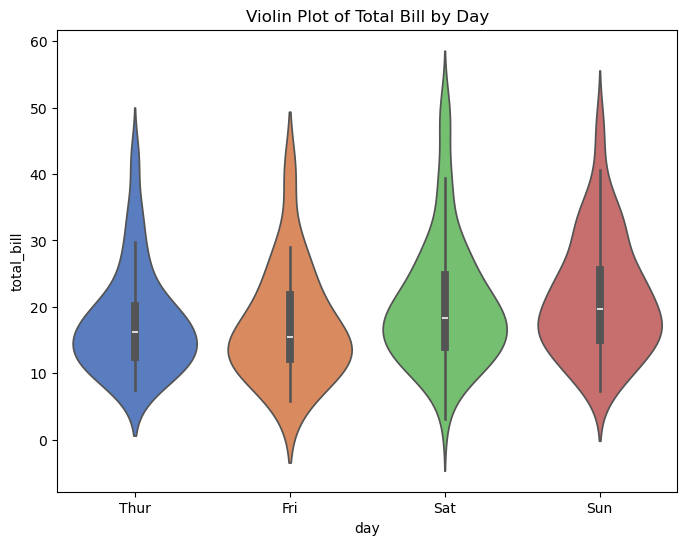

In [97]:
# Violin plot
plt.figure(figsize=(8,6))
sns.violinplot(x='day', y='total_bill', data=tips, palette='muted')
plt.title('Violin Plot of Total Bill by Day')
plt.show()

### Density Plot
A density plot shows the distribution of a numeric variable.

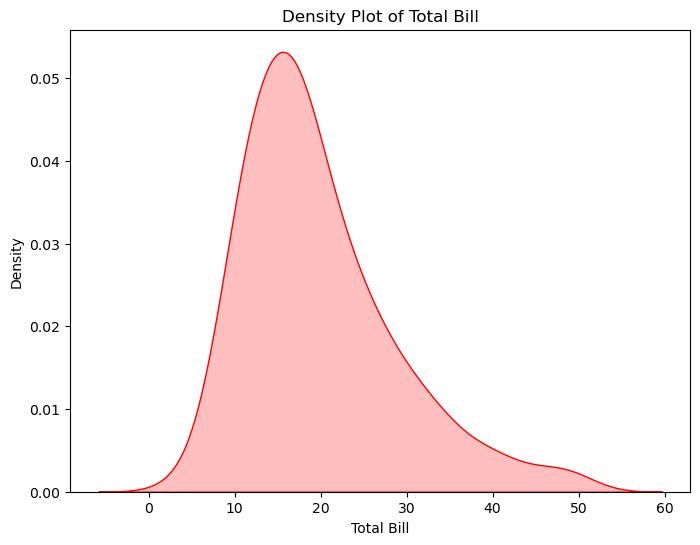

In [99]:
# Density plot
plt.figure(figsize=(8,6))
sns.kdeplot(tips['total_bill'], shade=True, color='r')
plt.title('Density Plot of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Density')
plt.show()

### Histogram
A histogram displays the distribution of a numeric variable.

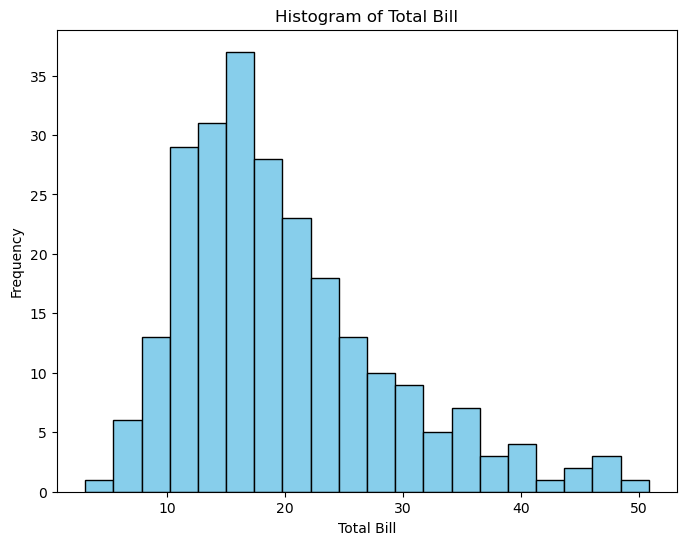

In [101]:
# Histogram
plt.figure(figsize=(8,6))
plt.hist(tips['total_bill'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

### Boxplot
A boxplot summarizes data using the median, quartiles, and extremes.

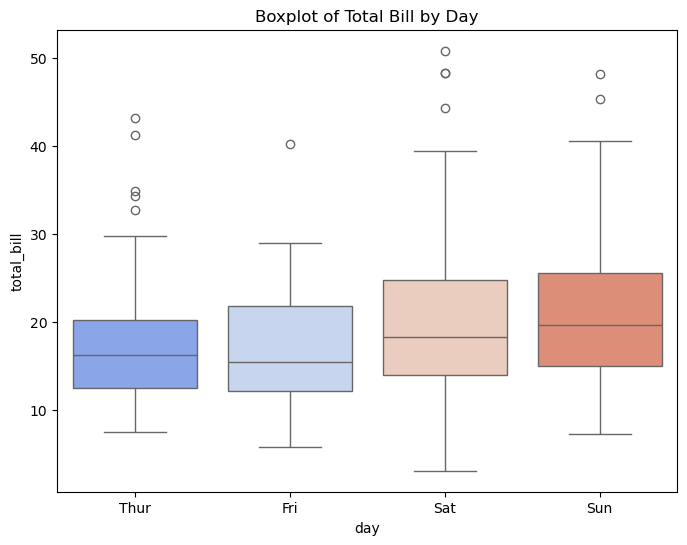

In [103]:
# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='total_bill', data=tips, palette='coolwarm')
plt.title('Boxplot of Total Bill by Day')
plt.show()

### Ridgeline Plot
A ridgeline plot shows the distribution of a numeric value for several groups.

In [105]:
# Ridgeline plot
plt.figure(figsize=(8,6))
joypy.joyplot(tips, by='day', column='total_bill', colormap=plt.cm.coolwarm, figsize=(8,6))
plt.title('Ridgeline Plot of Total Bill by Day')
plt.show()

NameError: name 'joypy' is not defined

<Figure size 800x600 with 0 Axes>

### Beeswarm Plot
A beeswarm plot shows the distribution of a single variable.

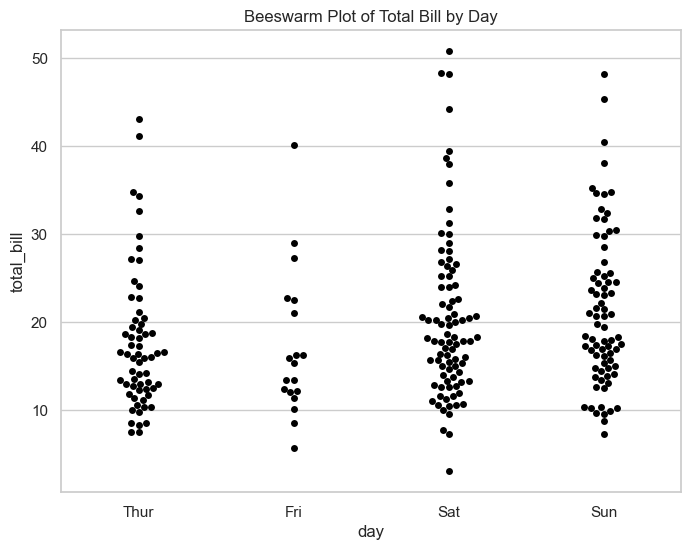

In [76]:
# Beeswarm plot
plt.figure(figsize=(8,6))
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')
plt.title('Beeswarm Plot of Total Bill by Day')
plt.show()

## Correlation Plots

### Scatterplot
A scatterplot displays the relationship between two numeric variables.

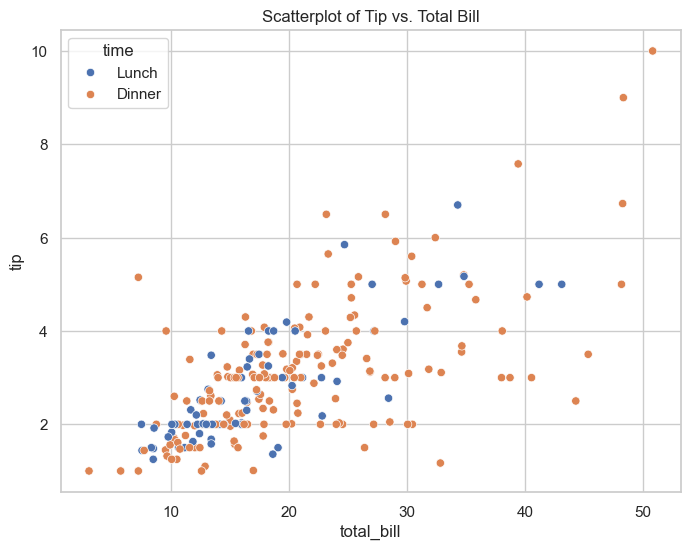

In [78]:
# Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='time')
plt.title('Scatterplot of Tip vs. Total Bill')
plt.show()

### Heatmap
A heatmap visualizes the correlation matrix.

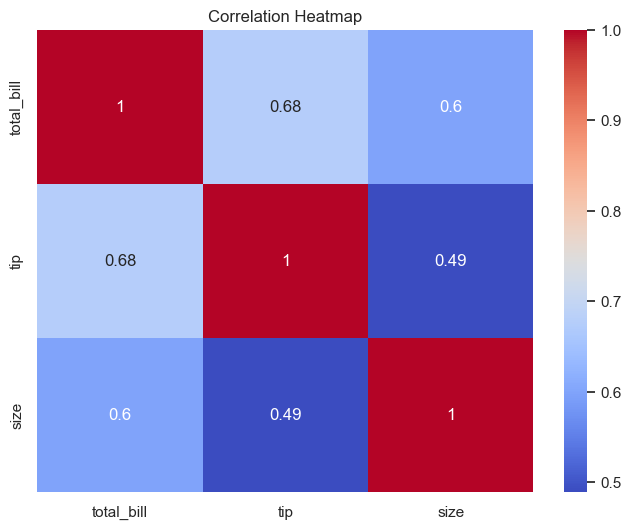

In [80]:
# Select only numeric columns for correlation
numeric_tips = tips.select_dtypes(include='number')

# Compute the correlation matrix
corr = numeric_tips.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Correlogram

A correlogram shows pairwise correlations.

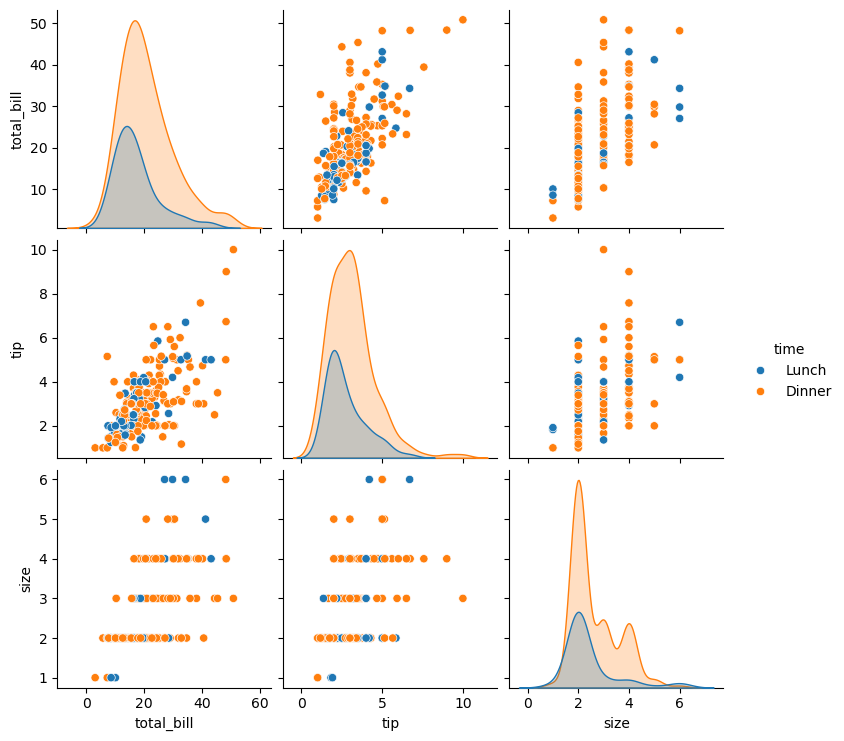

In [107]:
# Correlogram
sns.pairplot(tips, hue='time')
plt.show()


### Bubble Plot

A bubble plot adds a third variable by sizing the markers.

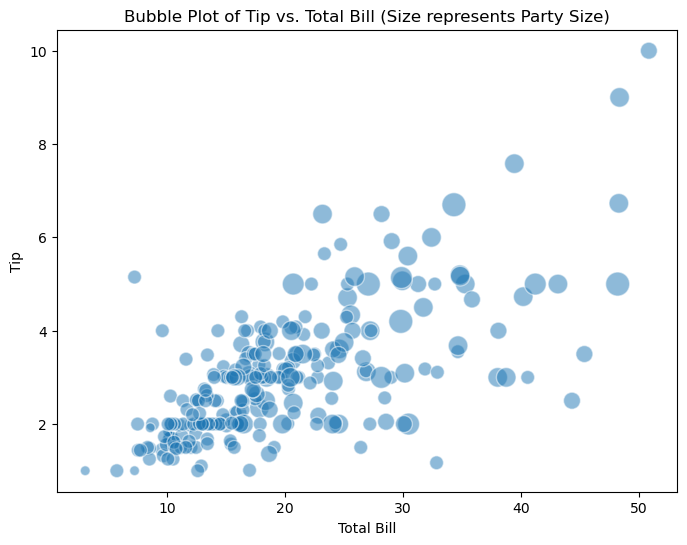

In [109]:
# Bubble plot
plt.figure(figsize=(8,6))
plt.scatter(tips['total_bill'], tips['tip'], s=tips['size']*50, alpha=0.5, edgecolors='w')
plt.title('Bubble Plot of Tip vs. Total Bill (Size represents Party Size)')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

### Connected Scatterplot

A connected scatterplot shows how two variables are connected over time.

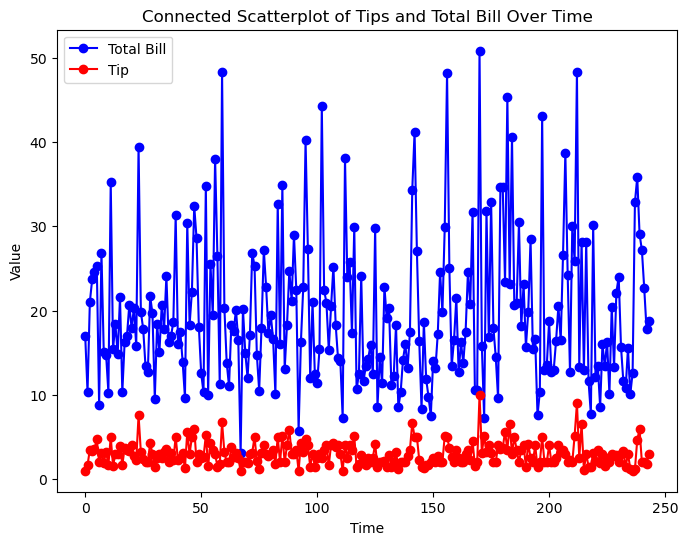

In [111]:
# Adding a 'time' column for a sequential order
tips_sorted = tips.copy()
tips_sorted['time'] = range(len(tips_sorted))  # Sequential time index

# Sort data by the 'time' column
tips_sorted = tips_sorted.sort_values('time')

# Connected scatterplot showing the change in tips over time
plt.figure(figsize=(8, 6))
plt.plot(tips_sorted['time'], tips_sorted['total_bill'], marker='o', linestyle='-', color='b', label='Total Bill')
plt.plot(tips_sorted['time'], tips_sorted['tip'], marker='o', linestyle='-', color='r', label='Tip')
plt.title('Connected Scatterplot of Tips and Total Bill Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


### 2D Density Plot
A 2D density plot shows the density of points.

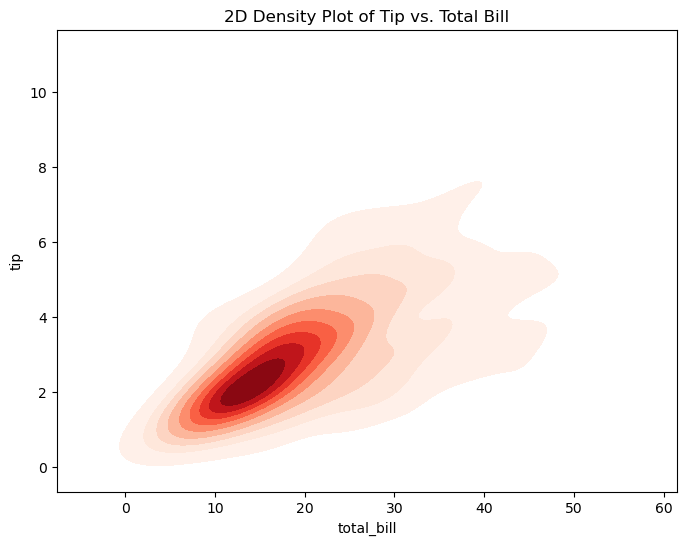

In [113]:
# 2D Density plot
plt.figure(figsize=(8,6))
sns.kdeplot(x='total_bill', y='tip', data=tips, cmap="Reds", shade=True, thresh=0.05)
plt.title('2D Density Plot of Tip vs. Total Bill')
plt.show()

## Ranking Plots

### Barplot

A barplot shows the relationship between a categorical variable and a numeric variable.

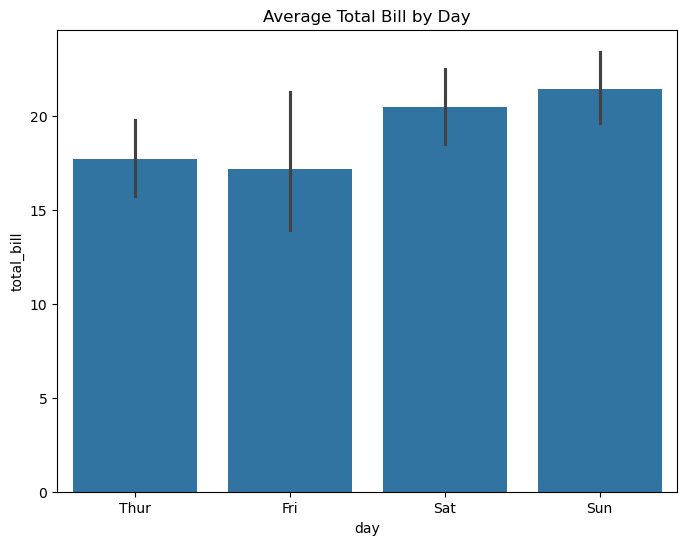

In [115]:
# Barplot
plt.figure(figsize=(8,6))
sns.barplot(x='day', y='total_bill', data=tips, estimator=np.mean)
plt.title('Average Total Bill by Day')
plt.show()

### Spider/Radar Chart

A radar chart displays multivariate data in the form of a two-dimensional chart.

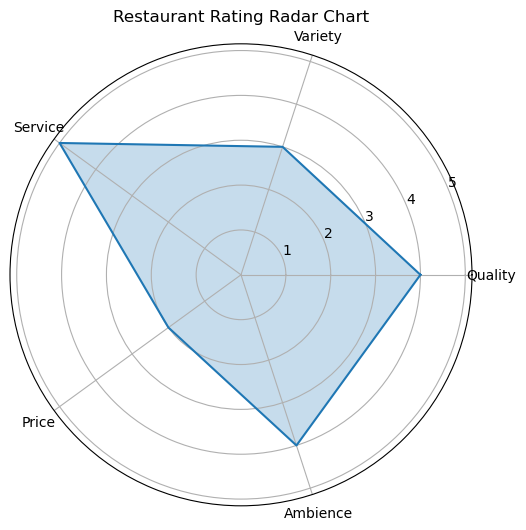

In [117]:
# Spider/Radar Chart
categories = ['Quality', 'Variety', 'Service', 'Price', 'Ambience']
values = [4, 3, 5, 2, 4]
values += values[:1]  # Repeat the first value to close the circular graph

angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(8,6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories)

ax.plot(angles, values)
ax.fill(angles, values, alpha=0.25)
plt.title('Restaurant Rating Radar Chart')
plt.show()

### Wordcloud

A wordcloud visualizes text data.

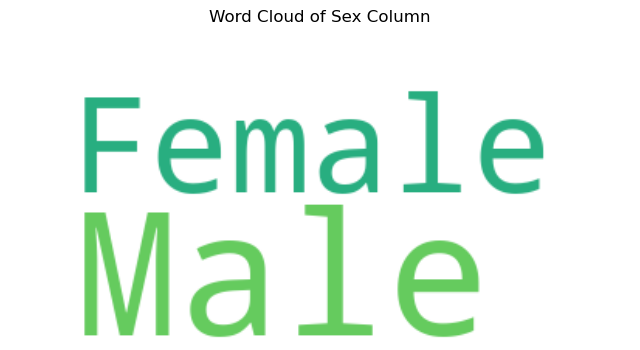

In [127]:
# Wordcloud
text = " ".join(tips['sex'])
wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Sex Column')
plt.show()


### Parallel Coordinates Plot

A parallel coordinates plot visualizes multi-dimensional data.

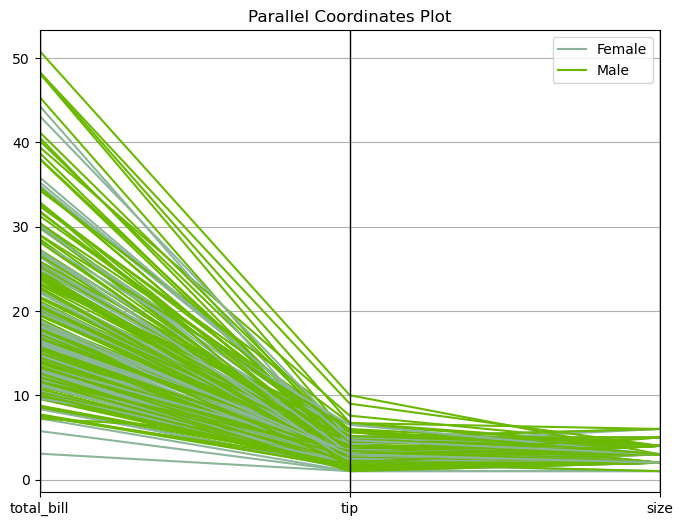

In [129]:
# Parallel coordinates
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(8,6))
parallel_coordinates(tips[['total_bill', 'tip', 'size', 'sex']], 'sex')
plt.title('Parallel Coordinates Plot')
plt.show()

### Lollipop Chart

A lollipop chart is similar to a bar chart, but replaces the bar with a line and a dot.

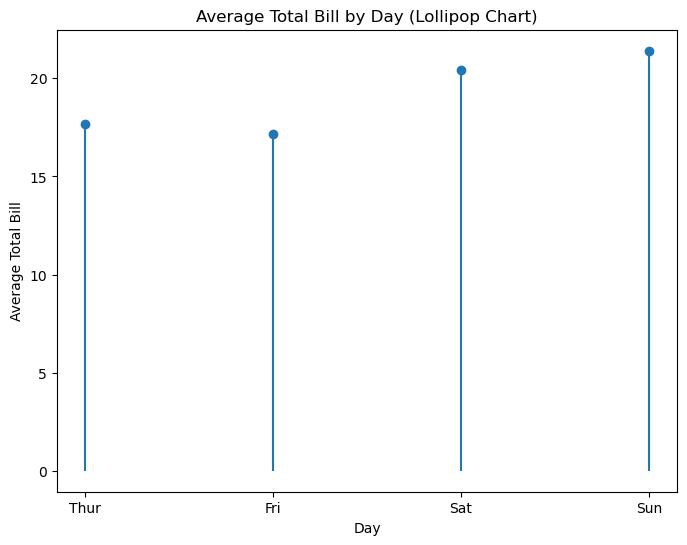

In [131]:
# Lollipop chart
avg_total_bill = tips.groupby('day')['total_bill'].mean().reset_index()

plt.figure(figsize=(8,6))
plt.stem(avg_total_bill['day'], avg_total_bill['total_bill'], basefmt=" ")
plt.title('Average Total Bill by Day (Lollipop Chart)')
plt.xlabel('Day')
plt.ylabel('Average Total Bill')
plt.show()

### Circular Barplot

A circular barplot displays bars along a circle.

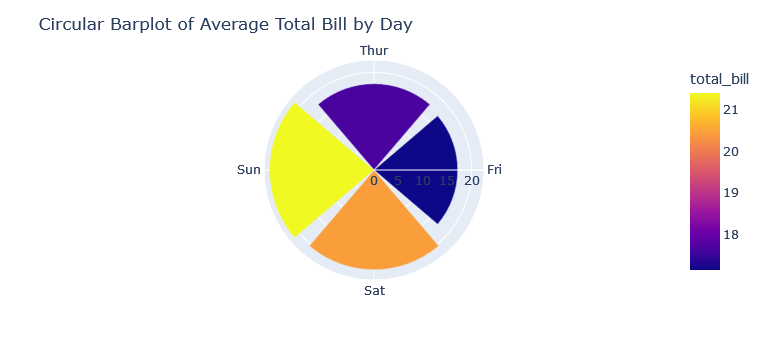

In [133]:
# Circular Barplot
import plotly.express as px

fig = px.bar_polar(avg_total_bill, r='total_bill', theta='day', color='total_bill',
                   color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(title='Circular Barplot of Average Total Bill by Day')
fig.show()

## Part of a Whole

### Treemap
A treemap displays hierarchical data as a set of nested rectangles.

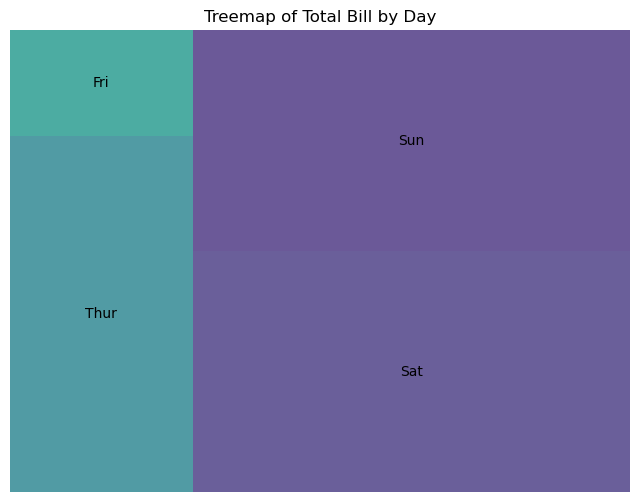

In [135]:
# Treemap
import squarify #!pip install squarify

sizes = tips.groupby('day')['total_bill'].sum().values
labels = tips.groupby('day')['total_bill'].sum().index

plt.figure(figsize=(8,6))
squarify.plot(sizes=sizes, label=labels, alpha=.8)
plt.axis('off')
plt.title('Treemap of Total Bill by Day')
plt.show()

### Venn Diagram 
A Venn diagram shows all possible logical relations between a finite collection of different sets.

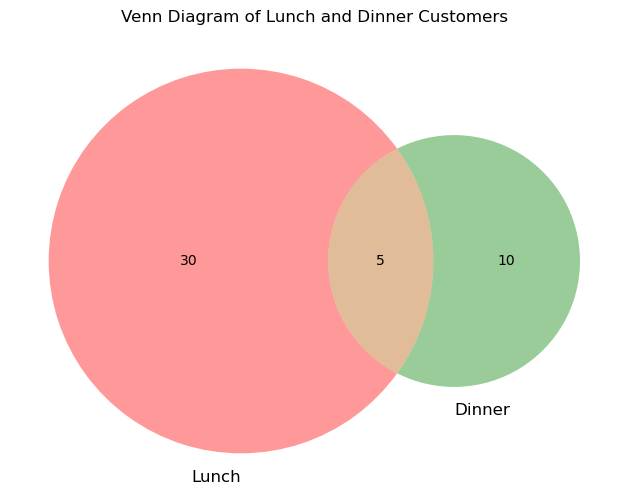

In [141]:
from matplotlib_venn import venn2
# Venn diagram
plt.figure(figsize=(8,6))
venn2(subsets = (30, 10, 5), set_labels = ('Lunch', 'Dinner'))
plt.title('Venn Diagram of Lunch and Dinner Customers')
plt.show()

### Donut Chart

A donut chart is a variation of a pie chart with a hole in the center.

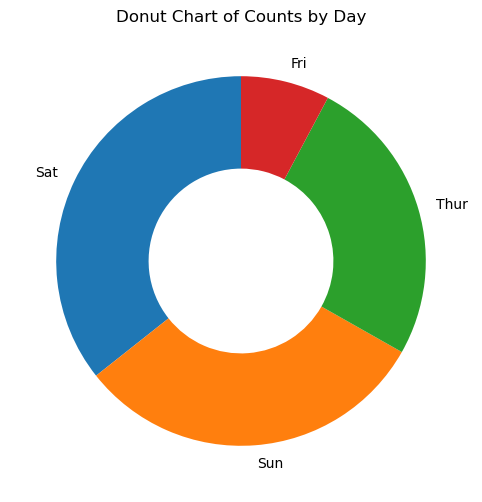

In [143]:
# Donut chart
sizes = tips['day'].value_counts()
labels = sizes.index

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, startangle=90, wedgeprops={'width':0.5})
plt.title('Donut Chart of Counts by Day')
plt.show()

### Pie Chart

A pie chart shows percentages of a whole.

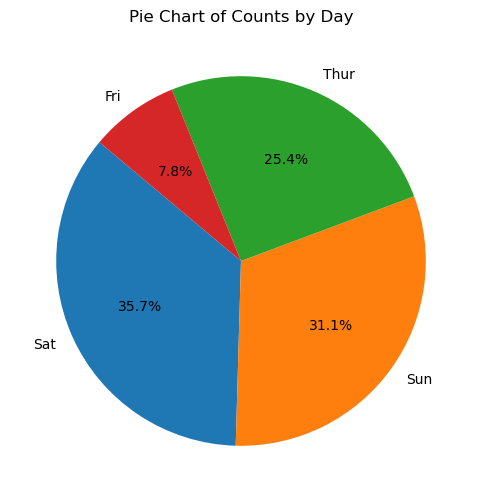

In [145]:
# Pie chart
plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Counts by Day')
plt.show()

### Waffle Chart

A waffle chart shows progress towards goals.

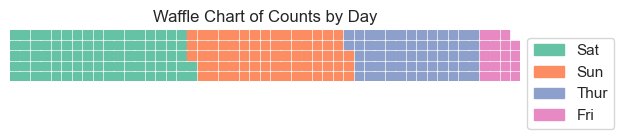

In [151]:
# Waffle chart
data = tips['day'].value_counts().to_dict()

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    title={'label': 'Waffle Chart of Counts by Day', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()


## Evolution Plots

### Line Chart
A line chart displays data points connected by lines.

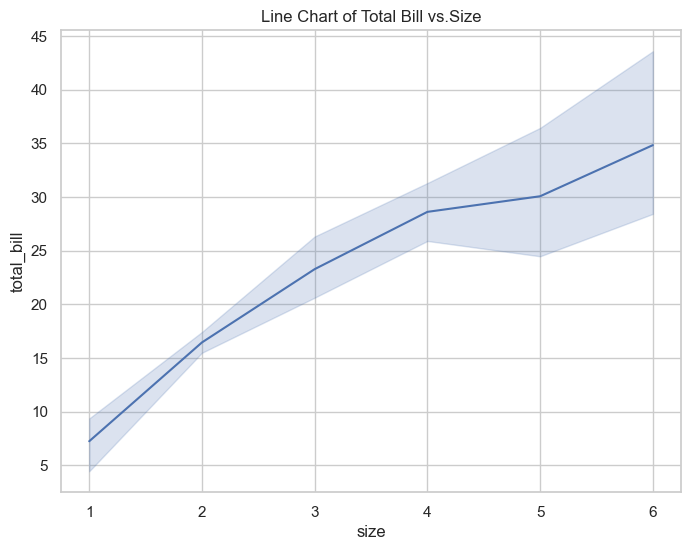

In [153]:
# Line chart
plt.figure(figsize=(8,6))
sns.lineplot(x='size', y='total_bill', data=tips)
plt.title('Line Chart of Total Bill vs.Size')
plt.show()

### Candlestick Chart

A candlestick chart shows price movements

[*********************100%***********************]  1 of 1 completed


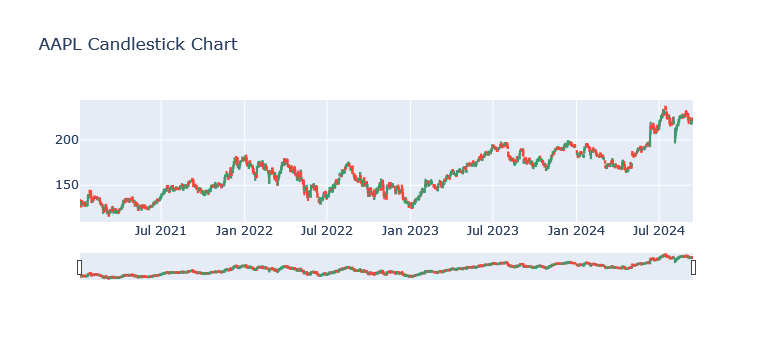

In [155]:
#pip install yfinance
import yfinance as yf
import plotly.graph_objects as go
import datetime as dt

# Define the time range
start = dt.datetime(2021, 1, 1)
end = dt.datetime.now()

# Fetch the stock data using yfinance
df_stock = yf.download('AAPL', start=start, end=end)

# Create a candlestick chart using Plotly
fig = go.Figure(data=[go.Candlestick(x=df_stock.index,
                                     open=df_stock['Open'],
                                     high=df_stock['High'],
                                     low=df_stock['Low'],
                                     close=df_stock['Close'])])

# Update the layout of the chart
fig.update_layout(title='AAPL Candlestick Chart')
fig.show()


### Timeseries Plot

A timeseries plot shows data points over time.

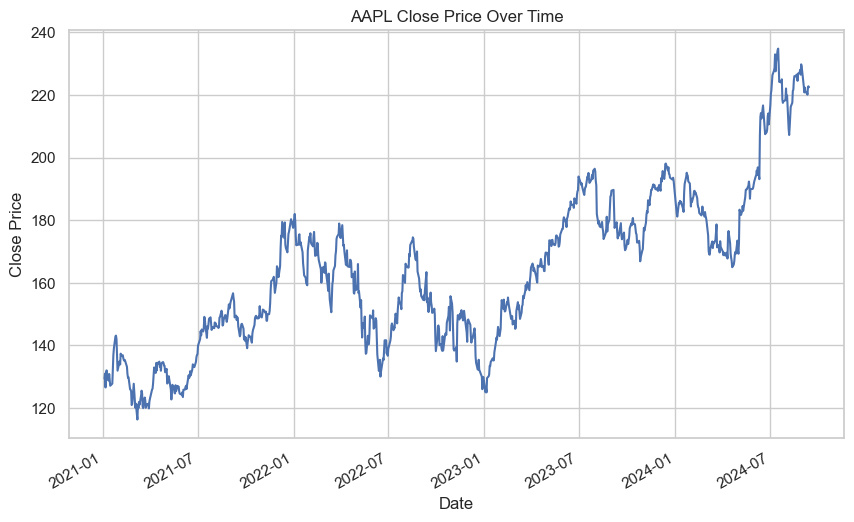

In [157]:
# Timeseries plot
plt.figure(figsize=(10,6))
df_stock['Close'].plot()
plt.title('AAPL Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


## Map Visualizations

### Choropleth map
A choropleth map uses colors to represent data values.

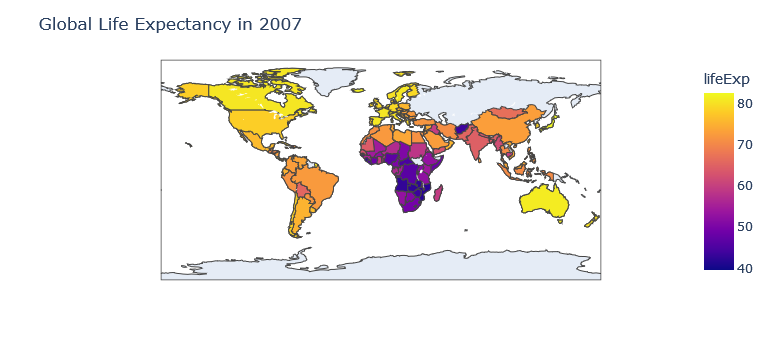

In [159]:
# Choropleth map using Plotly
df_map = px.data.gapminder().query("year == 2007")
fig = px.choropleth(df_map, locations="iso_alpha",
                    color="lifeExp",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(title='Global Life Expectancy in 2007')
fig.show()


### Bubble Map

A bubble map displays data points with bubbles over a map.

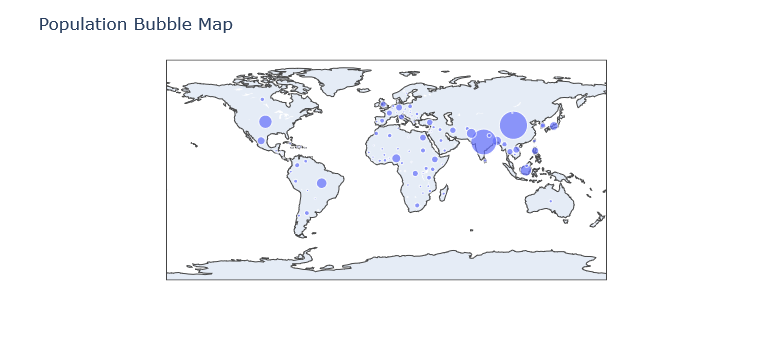

In [161]:
# Bubble map
fig = px.scatter_geo(df_map, locations="iso_alpha", size="pop", hover_name="country")
fig.update_layout(title='Population Bubble Map')
fig.show()


## Flow Diagrams

### Network Graph
A network graph shows relationships between entities.

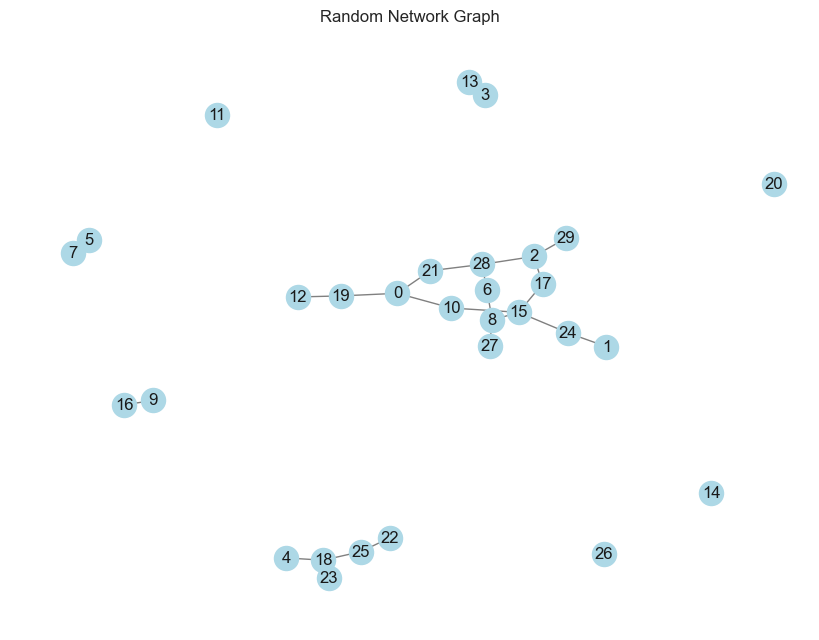

In [163]:
# Network graph
G = nx.erdos_renyi_graph(30, 0.05)

plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title('Random Network Graph')
plt.show()

### Sankey Diagram
A Sankey diagram shows flow quantities

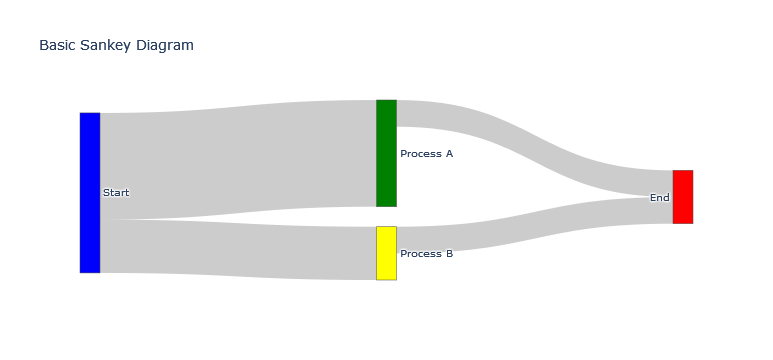

In [165]:
# Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
      label = ["Start", "Process A", "Process B", "End"],
      color = ["blue", "green", "yellow", "red"]
    ),
    link = dict(
      source = [0, 0, 1, 2],
      target = [1, 2, 3, 3],
      value = [8, 4, 2, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

# <a name="conclusion"></a> Conclusion

-    Data Cleaning and Imputation: Handling missing values using mean, median, and interpolation.
-    Handling Outliers: Detecting and treating outliers to improve data quality.
-    Feature Scaling and Normalization: Scaling data for better performance in algorithms.
-    Data Transformation: Transforming data to handle skewness and reveal patterns.
-    Categorical Variable Encoding: Converting categorical variables into numerical format.
-    Creating New Columns: Enhancing data with additional features.
-    Aggregating and Grouping Data: Summarizing data for insightful analysis.
-    Visualization Best Practices: Choosing appropriate colors and maintaining consistency.
-    Various Plots: Demonstrated multiple plot types to represent data effectively.

By following these guidelines, you can create informative and visually appealing dash

To further enhance the visualizations in this notebook, consider the following improvements:

- **Add Logarithmic Scales**: For plots dealing with data that spans several orders of magnitude, applying a logarithmic scale can improve readability and highlight trends that may not be visible on a linear scale. This is particularly useful for datasets with exponential growth or heavy-tailed distributions.

In [ ]:
# Applying log scale to y-axis
plt.yscale('log')

- **Display Axis Labels in Scientific Notation**: Adjust the axis tick labels to show numbers in scientific notation (e.g., $10^0$, $10^1$, $10^2$) instead of large integers. This can make the scales easier to interpret, especially when dealing with large numbers.

In [ ]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

# Set y-axis to use scientific notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

- **Enhance Plot Annotations and Labels**: Ensure that all plots have clear titles, axis labels, and legends where necessary. Annotations can help explain significant data points or trends within the plots.

- **Adjust Color Scales and Themes**: Re-evaluate the color schemes used in the plots to ensure they are visually appealing and colorblind-friendly. Utilizing consistent themes and palettes can enhance the overall coherence of the visualizations.